## Ames Housing Sale Price Data Analysis

### Problem and hypothesis
- The aim of this project is to predict Sale Price of houses in Ames, Iowa. Individual housing sale price data is available between the period of 2006 and 2010. This information will be used to identify the factors that contribute significantly to the Sale Price. An algorithm will then be established to predict the house price in Ames with minimal error. 
    - Background info: Ames has a population of 62,000 and the 9th best place to live in USA. There is robust/stable economy and the average temperature is 9.6 degree Celsius.
    - Null Hypothesis: Sale Price is not likely to have any relationship with the indepenent variables available from Ames Housing dataset.
    - Alternate hypothesis: Sale Price is likely to have relationship with the independent variables available from Ames Housing dataset.

### Data
- Housing data of individual house sales in Ames have been collected over the period from 2006 to 2010. 
- Kaggle dataset for Ames Housing contain 1460 observations and 81 variables. Variables include 20 continuous variables and 61 categorical variables. Dependent variable Sale Price is a continuous variable.

#### Data field Summary

Variable | Description | Type of variable
---|---|---
Id|Identification number|Categorical
MSSubClass| The building class|Categorical
MSZoning| The general zoning classification|Categorical
LotFrontage| Linear feet of street connected to property|Continuous
LotArea| Lot size in square feet|Continuous
Street| Type of road access|Categorical
Alley| Type of alley access|Categorical
LotShape| General shape of property|Categorical
LandContour| Flatness of the property|Categorical
Utilities| Type of utilities available|Categorical
LotConfig| Lot configuration|Categorical
LandSlope| Slope of property|Categorical
Neighborhood| Physical locations within Ames city limits|Categorical
Condition1| Proximity to main road or railroad|Categorical
Condition2| Proximity to main road or railroad (if a second is present)|Categorical
BldgType| Type of dwelling|Categorical
HouseStyle| Style of dwelling|Categorical
OverallQual| Overall material and finish quality|Categorical
OverallCond| Overall condition rating|Categorical
YearBuilt| Original construction date|Categorical
YearRemodAdd| Remodel date|Categorical
RoofStyle| Type of roof|Categorical
RoofMatl| Roof material|Categorical
Exterior1st| Exterior covering on house|Categorical
Exterior2nd| Exterior covering on house (if more than one material)|Categorical
MasVnrType| Masonry veneer type|Categorical
MasVnrArea| Masonry veneer area in square feet|Continuous
ExterQual| Exterior material quality|Categorical
ExterCond| Present condition of the material on the exterior|Categorical
Foundation| Type of foundation|Categorical
BsmtQual| Height of the basement|Categorical
BsmtCond| General condition of the basement|Categorical
BsmtExposure| Walkout or garden level basement walls|Categorical
BsmtFinType1| Quality of basement finished area|Categorical
BsmtFinSF1| Type 1 finished square feet|Continuous
BsmtFinType2| Quality of second finished area (if present)|Categorical
BsmtFinSF2| Type 2 finished square feet|Continuous
BsmtUnfSF| Unfinished square feet of basement area|Continuous
TotalBsmtSF| Total square feet of basement area|Continuous
Heating| Type of heating|Categorical
HeatingQC| Heating quality and condition|Categorical
CentralAir| Central air conditioning|Categorical
Electrical| Electrical system|Categorical
1stFlrSF| First Floor square feet|Continuous
2ndFlrSF| Second floor square feet|Continuous
LowQualFinSF| Low quality finished square feet (all floors)|Continuous
GrLivArea| Above grade (ground) living area square feet|Continuous
BsmtFullBath| Basement full bathrooms|Categorical
BsmtHalfBath| Basement half bathrooms|Categorical
FullBath| Full bathrooms above grade|Categorical
HalfBath| Half baths above grade|Categorical
Bedroom| Number of bedrooms above basement level|Categorical
Kitchen| Number of kitchens|Categorical
KitchenQual| Kitchen quality|Categorical
TotRmsAbvGrd| Total rooms above grade (does not include bathrooms)|Categorical
Functional| Home functionality rating|Categorical
Fireplaces| Number of fireplaces|Categorical
FireplaceQu| Fireplace quality|Categorical
GarageType| Garage location|Categorical
GarageYrBlt| Year garage was built|Categorical
GarageFinish| Interior finish of the garage|Categorical
GarageCars| Size of garage in car capacity|Categorical
GarageArea| Size of garage in square feet|Continuous
GarageQual| Garage quality|Categorical
GarageCond| Garage condition|Categorical
PavedDrive| Paved driveway|Categorical
WoodDeckSF| Wood deck area in square feet|Continuous
OpenPorchSF| Open porch area in square feet|Continuous
EnclosedPorch| Enclosed porch area in square feet|Continuous
3SsnPorch| Three season porch area in square feet|Continuous
ScreenPorch| Screen porch area in square feet|Continuous
PoolArea| Pool area in square feet|Continuous
PoolQC| Pool quality|Categorical
Fence| Fence quality|Categorical
MiscFeature| Miscellaneous feature not covered in other categories|Categorical
MiscVal| $Value of miscellaneous feature|Continuous
MoSold| Month Sold|Categorical
YrSold| Year Sold|Categorical
SaleType| Type of sale|Categorical
SaleCondition| Condition of sale|Categorical
SalePrice|Sale Price of house - dependent variable|Continuous


In [1]:
# Import all the libraries required for data analysis
import numpy as np
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import sklearn.linear_model

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import operator as op
sns.set_style("darkgrid")

In [2]:
# Read data file called AmesHousingTrain.csv
wd = "../dataset/"
#wd = "dataset/"
HousingData = pd.read_csv(wd + "AmesHousingTrain.csv")

In [3]:
# Review data
HousingData.head() # show first 5 rows

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Review data
HousingData.shape #show the number of observations and columns

(1460, 81)

In [5]:
# Summary of observations, mean, std dev, minimum & maximum values, quartiles for numerical data
HousingData.describe()

C:\Users\miche\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,NaN,7553.500000,5.000000,5.000000,1954.000000,1967.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,NaN,9478.500000,6.000000,5.000000,1973.000000,1994.000000,NaN,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,NaN,11601.500000,7.000000,6.000000,2000.000000,2004.000000,NaN,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Displaying the sum of null values for each of the columns
HousingData.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

Null values are present in some of the columns that do not appear to be relevant for SalePrice at the first glance. LotFrontage could have been relevant, but 259 null rows is a significant gap out of 1460 rows in total. Therefore LotFrontage is likely to be dropped from analysis. MasVnrArea with 8 null rows will be replaced with its mean value. This is a continuous variable that is likely to be useful for data analysis.

In [7]:
# Replacing null values with mean value of that column - MasVnrArea
HousingData['MasVnrArea'].fillna((HousingData['MasVnrArea'].mean()), inplace=True)
HousingData.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,NaN,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,NaN,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,NaN,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Null values have been replaced with mean for the feature MasVnrArea. NaN are no longer present in the describe summary table.

### Continuous Variable(s) Analysis

In [8]:
# Correlational matrix of Continous variables & Saleprice 
# This will determine whether there is a relatinship between these independent variables and SalePrice
ContinuosVars=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
               'LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',
               'PoolArea','SalePrice']
HousingData[ContinuosVars].corr()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice
LotFrontage,1.000000,0.426095,0.193014,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.351799
LotArea,0.426095,1.000000,0.103960,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.263843
MasVnrArea,0.193014,0.103960,1.000000,0.263582,-0.072302,0.114184,0.362452,0.342160,0.174019,-0.069068,0.389893,0.372567,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,0.475241
BsmtFinSF1,0.233633,0.214103,0.263582,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.386420
BsmtFinSF2,0.049900,0.111170,-0.072302,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,-0.011378
BsmtUnfSF,0.132644,-0.002618,0.114184,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,0.214479
TotalBsmtSF,0.392075,0.260833,0.362452,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,0.613581
1stFlrSF,0.457181,0.299475,0.342160,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,0.605852
2ndFlrSF,0.080177,0.050986,0.174019,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,0.687501,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.319334
LowQualFinSF,0.038469,0.004779,-0.069068,-0.064503,0.014807,0.028167,-0.033245,-0.014241,0.063353,1.000000,0.134683,-0.067601,-0.025444,0.018251,0.061081,-0.004296,0.026799,0.062157,-0.025606


### Continuous independent variables that have higher correlation with SalePrice

TotalBsmtSF: 0.614,
1stFlrSF: 0.605,
GrLivArea: 0.709,
GarageArea: 0.623

These variables have higher correlation with the dependent variable SalePrice.



### Multi-collinearity between independent variables

1stFlrSF and TotalBsmtSFt: 0.84,
2ndFlrSF and GrLivArea: 0.68

The first multi-collinearity(1stFlrSF and TotalBsmtSFt) is relevant to SalePrice, therefore will keep only one of those variables, TotalBsmtSF.

In summary, the most relevant continuos variables that have a relationship with SalePrice and kept for future analysis are TotalBsmtSF, GrLivArea, GarageArea.

(array([  39.,   15.,   67.,  277.,  370.,  260.,  164.,  139.,   69.,
          34.,   15.,    3.,    3.,    0.,    0.,    4.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    1.]),
 array([    0.        ,   203.66666667,   407.33333333,   611.        ,
          814.66666667,  1018.33333333,  1222.        ,  1425.66666667,
         1629.33333333,  1833.        ,  2036.66666667,  2240.33333333,
         2444.        ,  2647.66666667,  2851.33333333,  3055.        ,
         3258.66666667,  3462.33333333,  3666.        ,  3869.66666667,
         4073.33333333,  4277.        ,  4480.66666667,  4684.33333333,
         4888.        ,  5091.66666667,  5295.33333333,  5499.        ,
         5702.66666667,  5906.33333333,  6110.        ]),
 <a list of 30 Patch objects>)

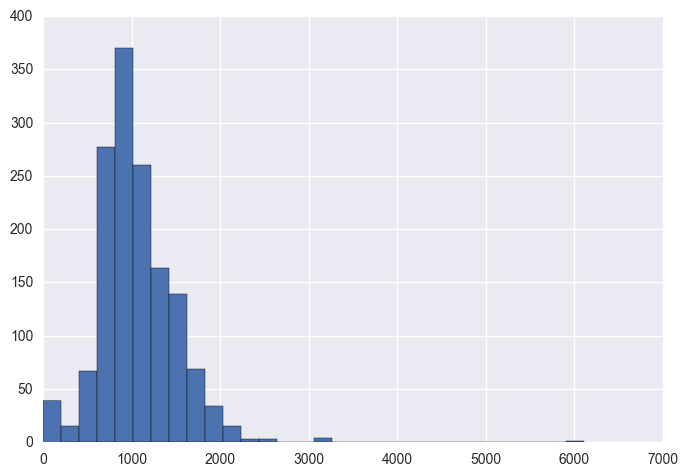

In [9]:
#Distribution of independent variable - TotalBsmtSF
plt.hist(HousingData.TotalBsmtSF,bins=30)

Few outliers can be seen from this data for TotalBsmtSF. Especially one at 6000. This can skew the outcome.

In [10]:
# Locating outlier row
HousingData.loc[HousingData.TotalBsmtSF > 5000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


(array([   3.,   11.,   93.,  159.,  192.,  203.,  203.,  208.,  124.,
          96.,   54.,   39.,   32.,   17.,    8.,    4.,    5.,    3.,
           2.,    0.,    0.,    0.,    1.,    1.,    1.,    0.,    0.,
           0.,    0.,    1.]),
 array([  334.        ,   510.93333333,   687.86666667,   864.8       ,
         1041.73333333,  1218.66666667,  1395.6       ,  1572.53333333,
         1749.46666667,  1926.4       ,  2103.33333333,  2280.26666667,
         2457.2       ,  2634.13333333,  2811.06666667,  2988.        ,
         3164.93333333,  3341.86666667,  3518.8       ,  3695.73333333,
         3872.66666667,  4049.6       ,  4226.53333333,  4403.46666667,
         4580.4       ,  4757.33333333,  4934.26666667,  5111.2       ,
         5288.13333333,  5465.06666667,  5642.        ]),
 <a list of 30 Patch objects>)

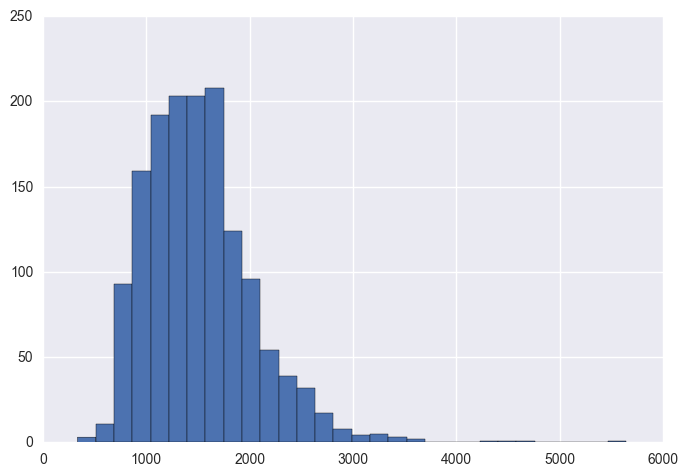

In [11]:
#Distribution of independent variable - GrLivArea
plt.hist(HousingData.GrLivArea,bins=30)

Few outliers can be seen from this data for GrLivArea. There are few values greater than 4000. This can skew the outcome.

In [12]:
# Locating outliers and outlier rows for GrLivArea
for value in HousingData['GrLivArea']:
    if value > 4000:
        print value
        
HousingData.loc[HousingData.GrLivArea > 4000]
    

4676
4316
4476
5642


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


(array([  81.,    0.,   27.,  140.,  152.,  141.,  278.,  222.,  153.,
          87.,   51.,   55.,   46.,   11.,    8.,    2.,    1.,    2.,
           0.,    3.]),
 array([    0. ,    70.9,   141.8,   212.7,   283.6,   354.5,   425.4,
          496.3,   567.2,   638.1,   709. ,   779.9,   850.8,   921.7,
          992.6,  1063.5,  1134.4,  1205.3,  1276.2,  1347.1,  1418. ]),
 <a list of 20 Patch objects>)

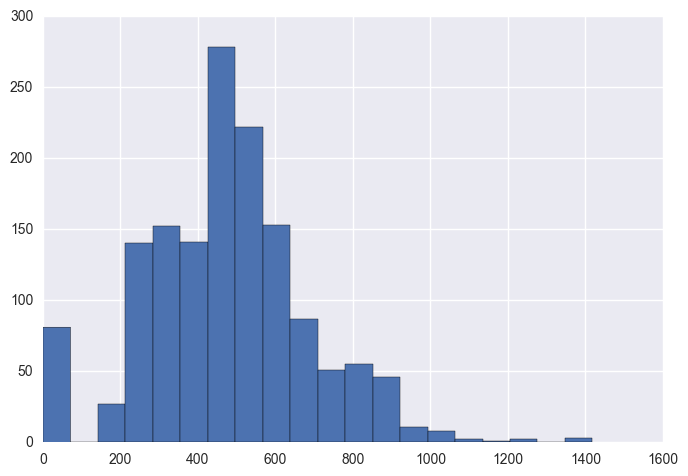

In [13]:
#Distribution of independent variable - GarageArea
plt.hist(HousingData.GarageArea,bins=20)

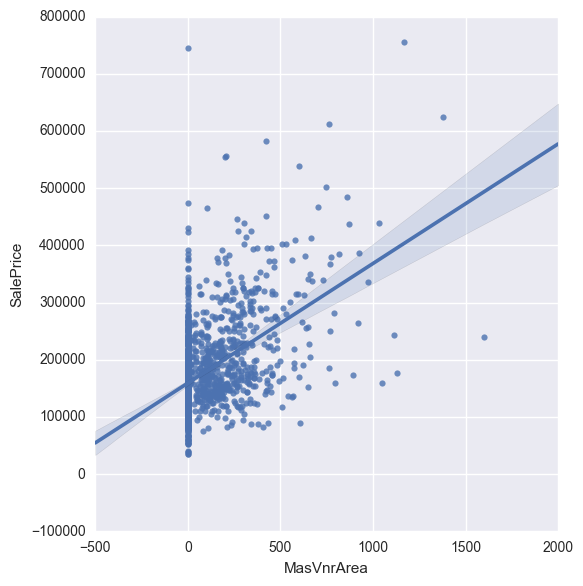

In [14]:
# Plot of independent variable - MasVnrArea
#plt.hist(HousingData.MasVnrArea, bins=30)
sns.lmplot(x = "MasVnrArea", y = "SalePrice", data = HousingData, size=6)

### Categorical Variable(s) Analysis

In [15]:
#Review of Categorical variable Neighborhood. Count of sale/s in each Neighborhood.
byNeighborhood=HousingData.groupby("Neighborhood")
byNeighborhood["Neighborhood"].count()

Neighborhood
Blmngtn     17
Blueste      2
BrDale      16
BrkSide     58
ClearCr     28
CollgCr    150
Crawfor     51
Edwards    100
Gilbert     79
IDOTRR      37
MeadowV     17
Mitchel     49
NAmes      225
NPkVill      9
NWAmes      73
NoRidge     41
NridgHt     77
OldTown    113
SWISU       25
Sawyer      74
SawyerW     59
Somerst     86
StoneBr     25
Timber      38
Veenker     11
Name: Neighborhood, dtype: int64

In [16]:
#Grouping Neighborhood by SalePrice
colstokeep=['Neighborhood','SalePrice']
Neighdata=HousingData[colstokeep]
Neighdata.head()
Neighdata.sort_values(by=['Neighborhood','SalePrice'],inplace=True)
Neighdata.head()

C:\Users\miche\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Neighborhood,SalePrice
982,Blmngtn,159895
790,Blmngtn,160200
219,Blmngtn,167240
443,Blmngtn,172500
1126,Blmngtn,174000


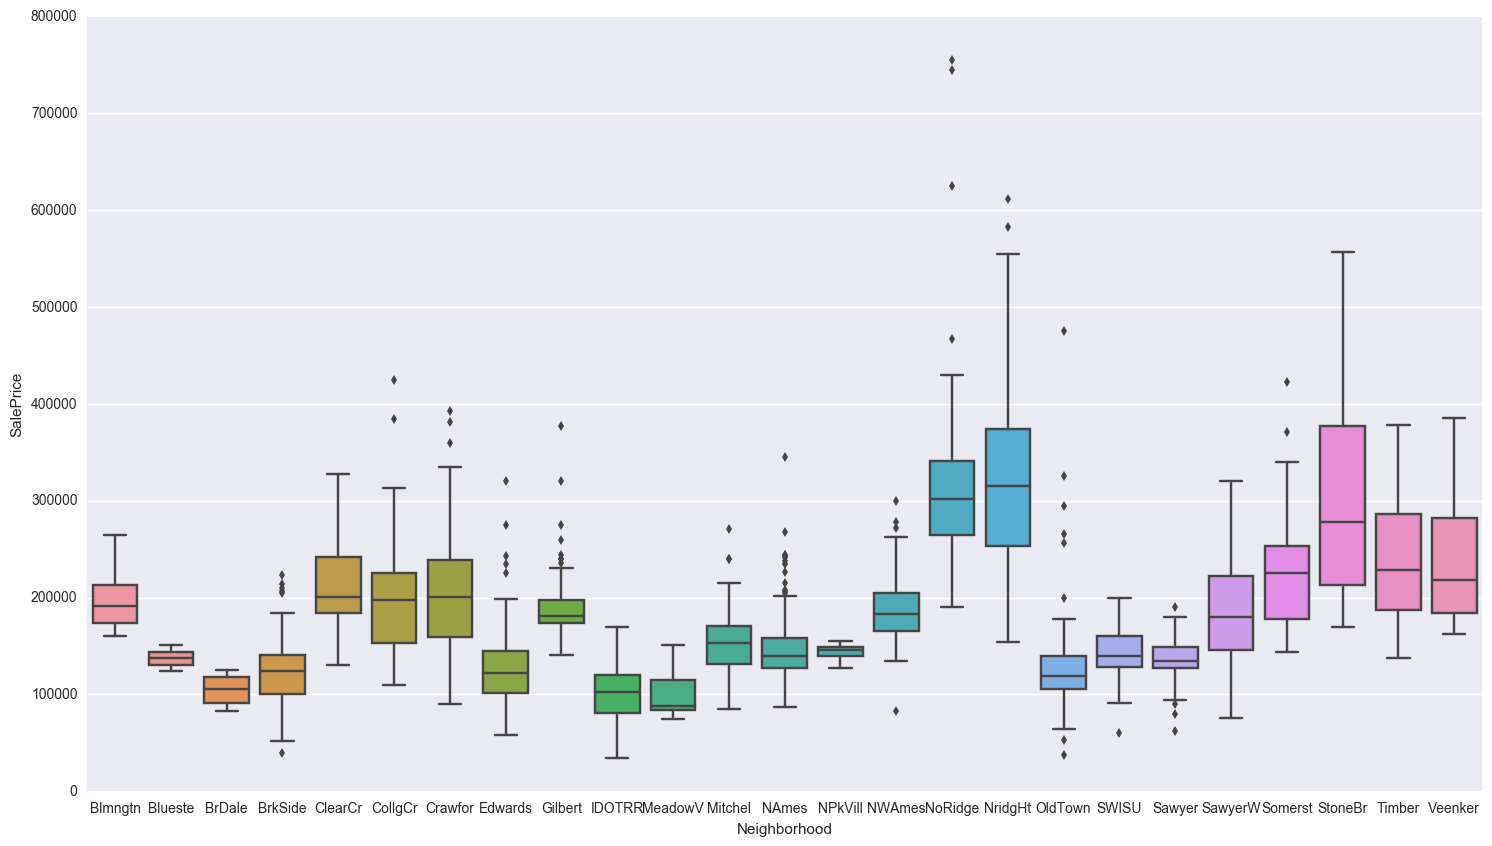

In [17]:
#Plot Neighborhood & SalePrice
plt.figure(figsize=[18,10])
sns.set(font_scale=1)
sns.boxplot(x="Neighborhood",y="SalePrice",data=Neighdata,)

These boxplots of differenct Neighborhood show signficant variance in SalePrice. Therefore this categorical variable will be incorporated into the regression model to investigate the degree of relationship further.

In [18]:
# SalePrice Mean, Std, Quartiles
print HousingData.SalePrice.describe()
pd.crosstab(HousingData.Neighborhood, HousingData.YrSold, margins=True)

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


YrSold,2006,2007,2008,2009,2010,All
Neighborhood,,,,,,
Blmngtn,7,2,2,5,1,17
Blueste,0,0,1,1,0,2
BrDale,4,3,4,4,1,16
BrkSide,15,10,14,17,2,58
ClearCr,6,6,8,4,4,28
CollgCr,32,30,36,39,13,150
Crawfor,11,19,9,9,3,51
Edwards,19,17,26,27,11,100
Gilbert,24,19,10,20,6,79


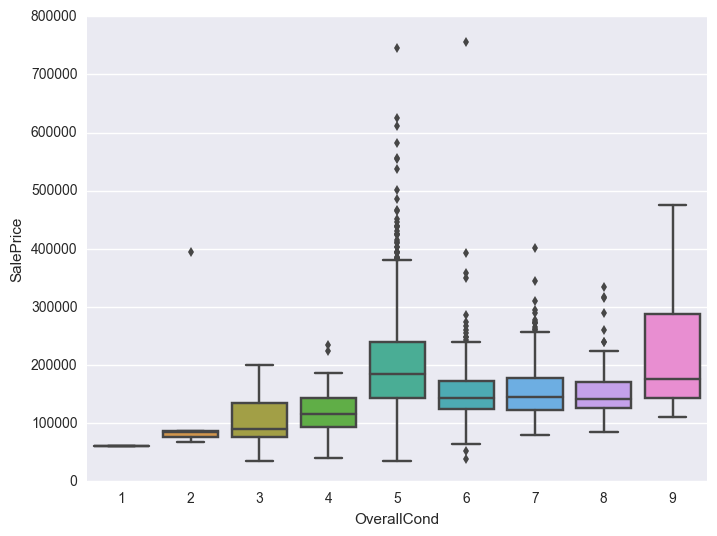

In [19]:
# Plot of OverallCond and SalePrice
plt.figure(figsize=[8,6])
sns.set(font_scale=1)
sns.boxplot(x="OverallCond",y="SalePrice",data=HousingData,)

Overall Condition of 5 and 9 show the most amount of change in SalePrice. The rest are fairly constant.

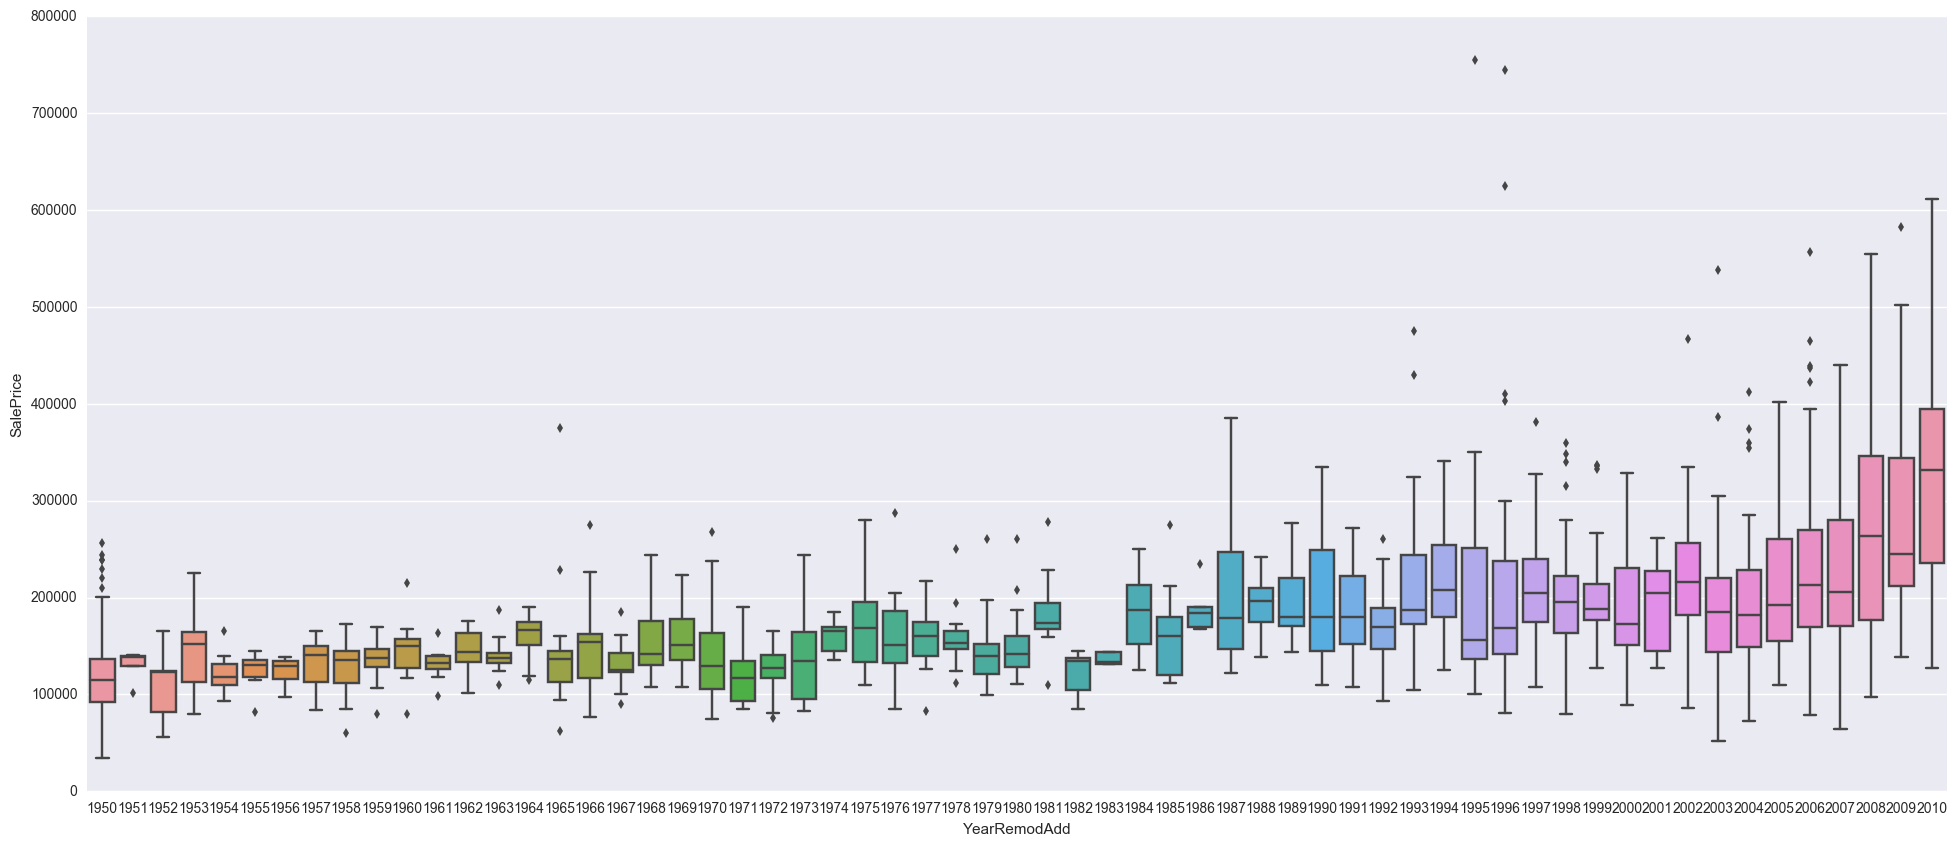

In [20]:
# Plot of YearRemodAdd and SalePrice
plt.figure(figsize=[24,10])
sns.set(font_scale=1)
sns.boxplot(x="YearRemodAdd",y="SalePrice",data=HousingData,)

The trend for this plot is increasing (SalePrice is increasing) as the Year Remod/Add becomes more recent. This predictor is worth adding in the regression model.

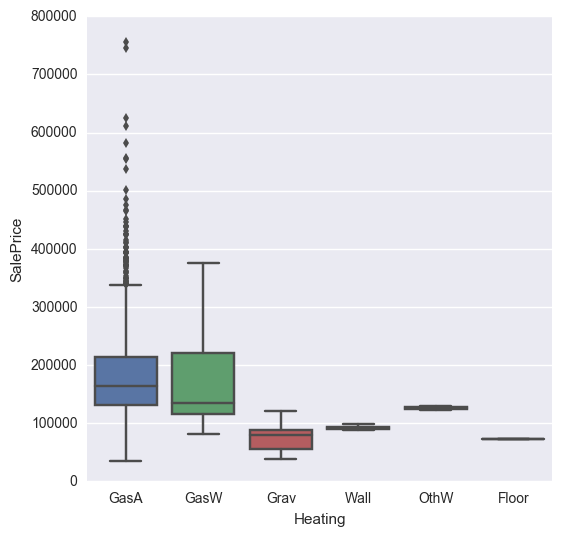

In [21]:
# Plot of Heating and SalePrice
plt.figure(figsize=[6,6])
sns.set(font_scale=1)
sns.boxplot(x="Heating",y="SalePrice",data=HousingData,)

Type of heating has some influence on SalePrice, but not that relevant to add to regression model.

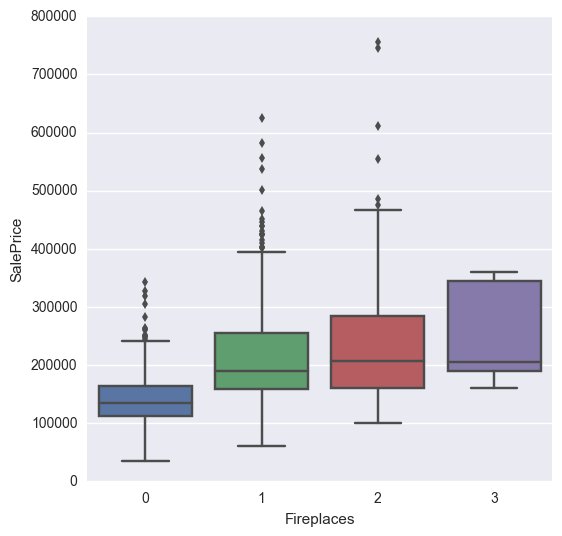

In [22]:
# Plot of Fireplaces and SalePrice
plt.figure(figsize=[6,6])
sns.set(font_scale=1)
sns.boxplot(x="Fireplaces",y="SalePrice",data=HousingData,)

There is a change in SalePrice with increased number of Fireplaces. There is a big difference in SalePrice from 0 fireplace to 1 or 2 fireplaces. This can be expected as the average Temp is 9.6 deg C.

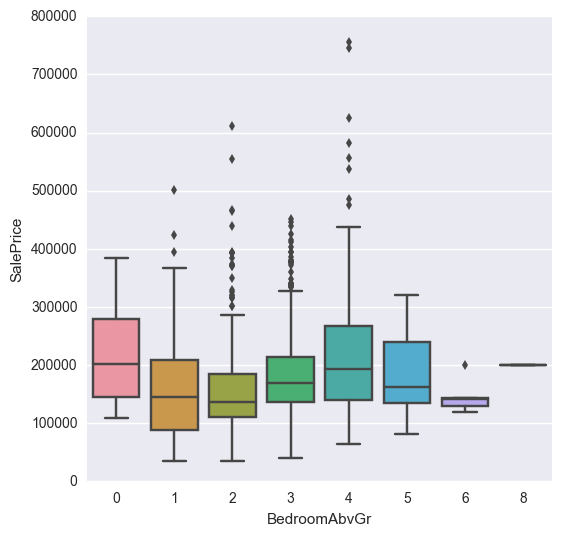

In [23]:
# Plot of BedroomAbvGrade and SalePrice
plt.figure(figsize=[6,6])
sns.set(font_scale=1)
sns.boxplot(x="BedroomAbvGr",y="SalePrice",data=HousingData,)

There is a slight change in SalePrice, but the variance is not as big other predictors to add to regression model.

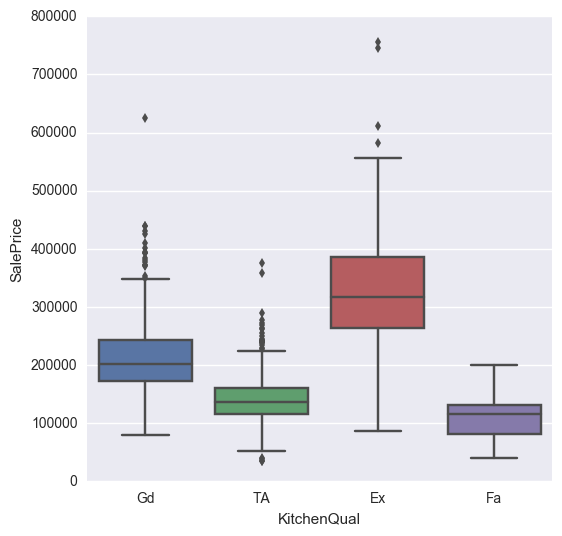

In [24]:
# Plot of KitchenQual and SalePrice
plt.figure(figsize=[6,6])
sns.set(font_scale=1)
sns.boxplot(x="KitchenQual",y="SalePrice",data=HousingData,)

KitchenQual of Excellent has increased SalePrice significantly. Add to regression model.

In summary add the following predictors to regression model:
YearRemodAdd,
Fireplaces,
KitchenQual

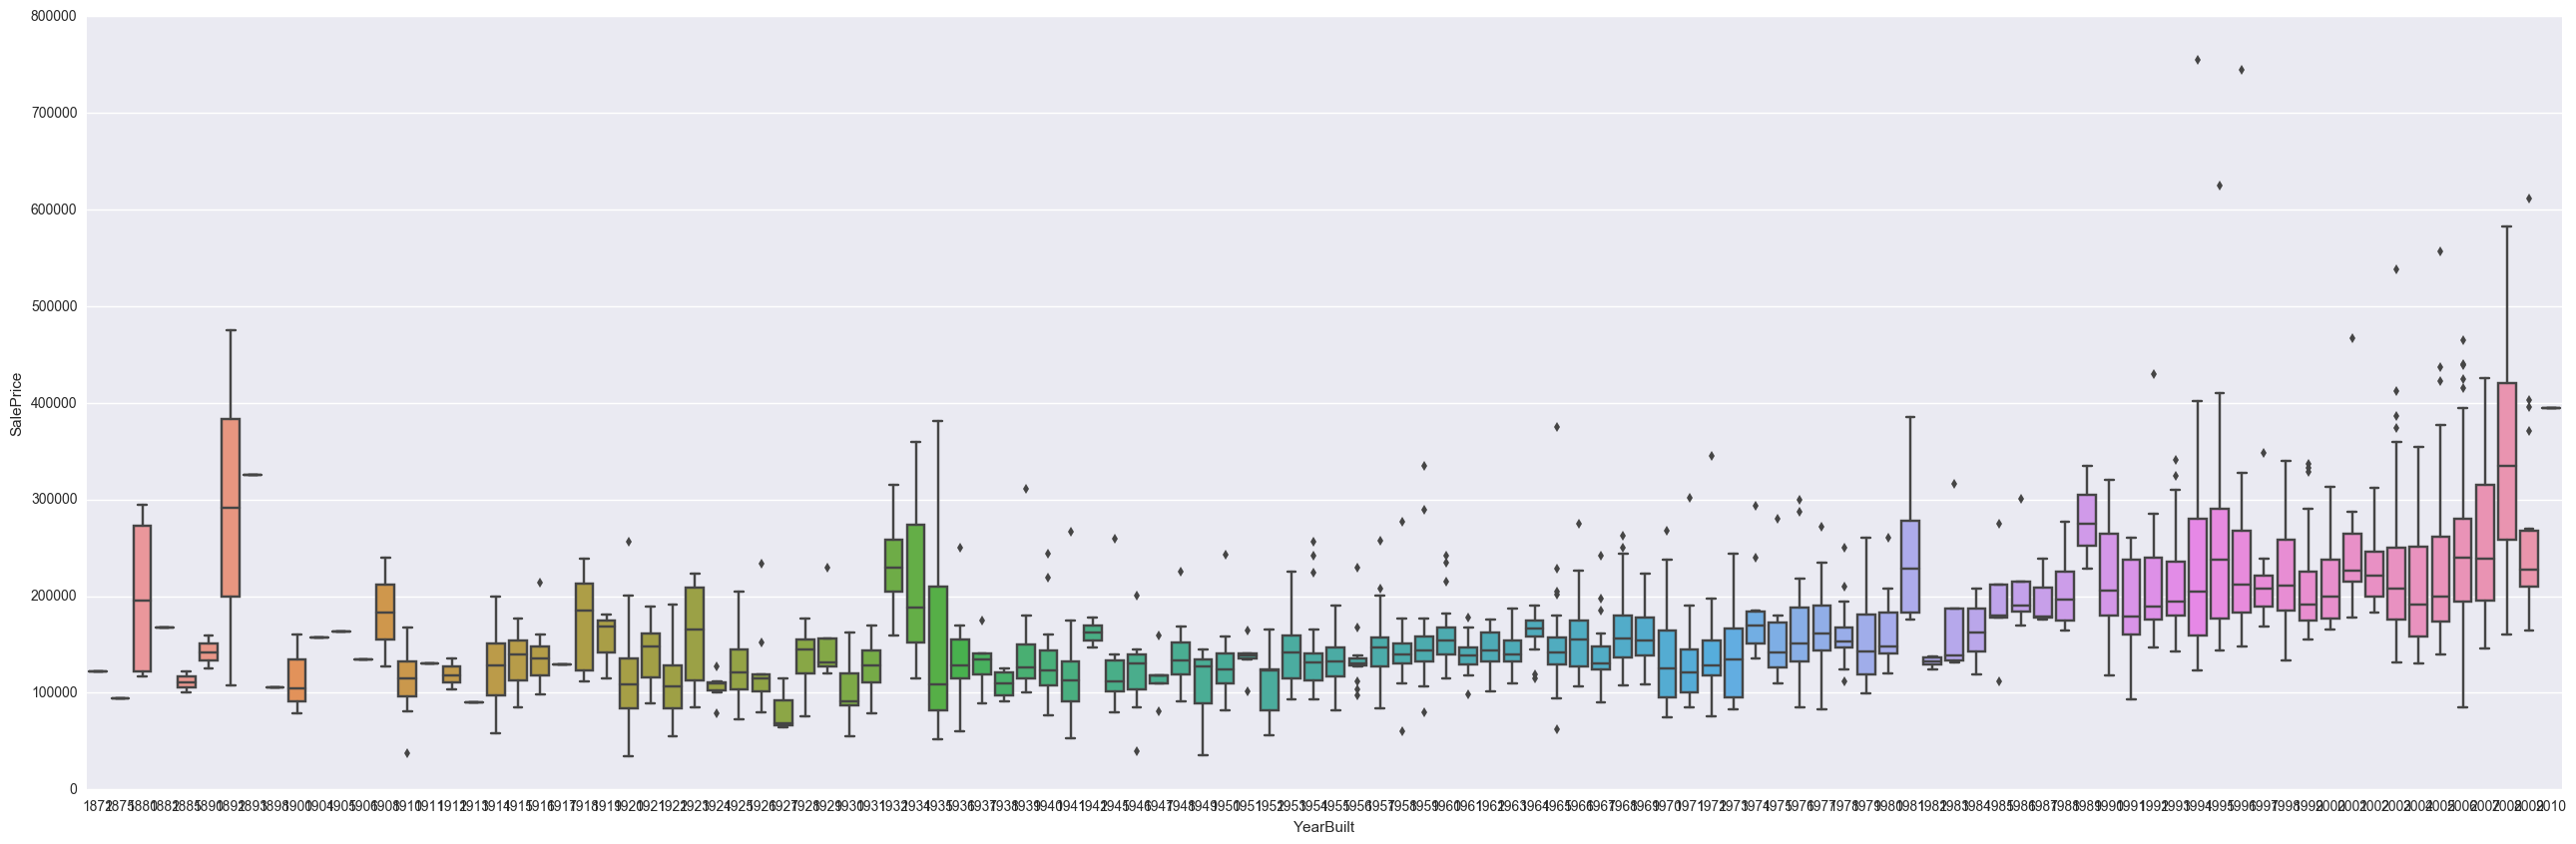

In [25]:
# Plot of YearBuilt and SalePrice
plt.figure(figsize=[32,10])
sns.set(font_scale=1)
sns.boxplot(x="YearBuilt",y="SalePrice",data=HousingData,)

There is some variance noted, but considering the large number of variables present this dataset, the variance is likely not to be very significant.

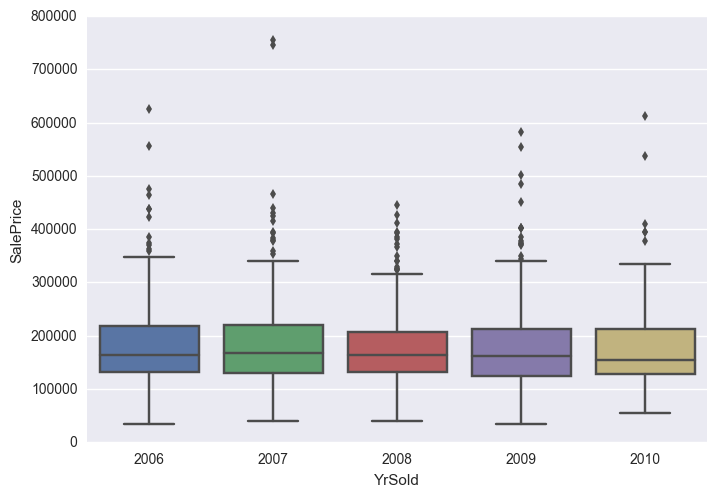

In [26]:
sns.boxplot(x="YrSold",y="SalePrice",data=HousingData,)

Plots appear quite constant, so this is not contributing to the variance in SalePrice very much.

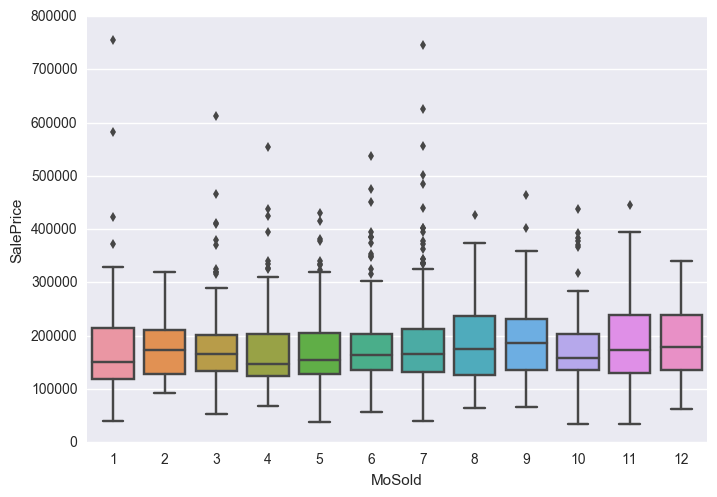

In [27]:
sns.boxplot(x="MoSold",y="SalePrice",data=HousingData,)

YrSold and MoSold do not seem to have significant relation to SalePrice. Timeseries analysis is unlikely to be required.

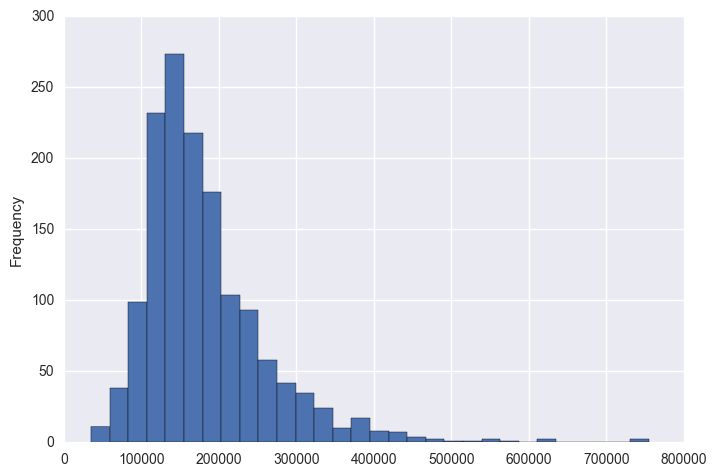

In [28]:
# Plotting SalePrice
HousingData['SalePrice'].plot(kind='hist', bins=30)

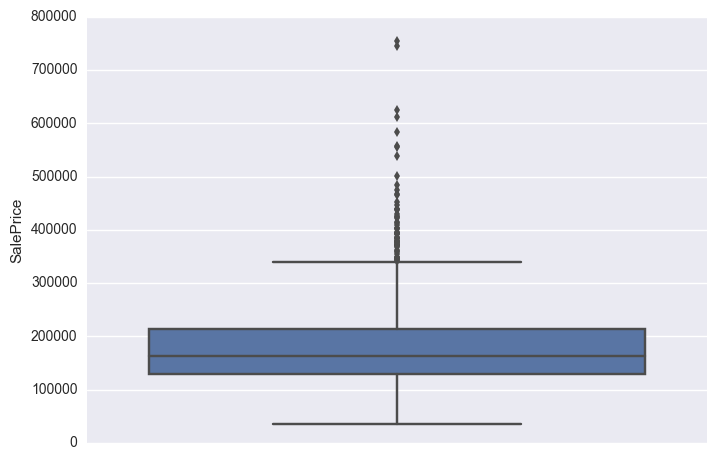

In [29]:
# Box plot of SalePrice
#HousingData['SalePrice'].plot.box()
#HousingData['SalePrice'].plot(kind='box')
sns.boxplot(y='SalePrice',data=HousingData)

There are 2 outliers quite far out above 700000 dollars that can skew the analysis.

In [30]:
# Locating outlier rows
HousingData.loc[HousingData.SalePrice > 700000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


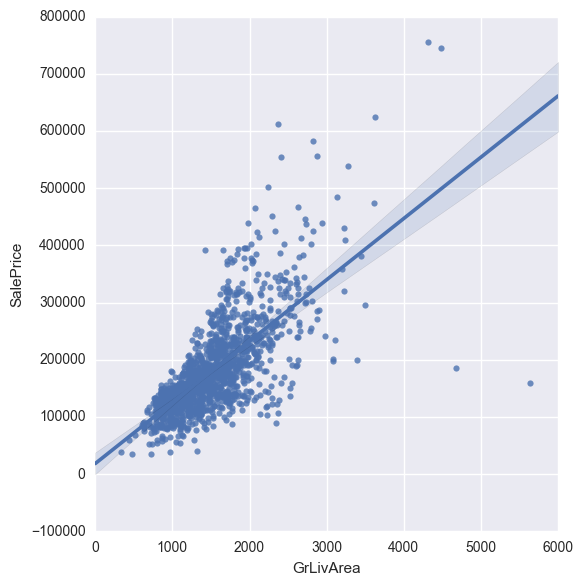

In [31]:
# Plotting to see outliers for GrLivArea and SalePrice plot
#plt.figure(figsize=[18,10])
sns.lmplot(x = "GrLivArea", y = "SalePrice", data = HousingData, size=6)
#sns.plt.show()

From this plot there appear to be 2 outliers when GrLivArea is greater than 4500 sqfeet with SalePrice below 200,000 dollars. 
There appear to be 2 more outliers for SalePrice above 700,000 dollars. Removing these outliers might improve the data model.

Based on all the analysis conducted so far, these 4 outliers are from rows 523, 691, 1182 and 1298. Dropping these rows might improve the regression model. This comparison can be performed later down the track.

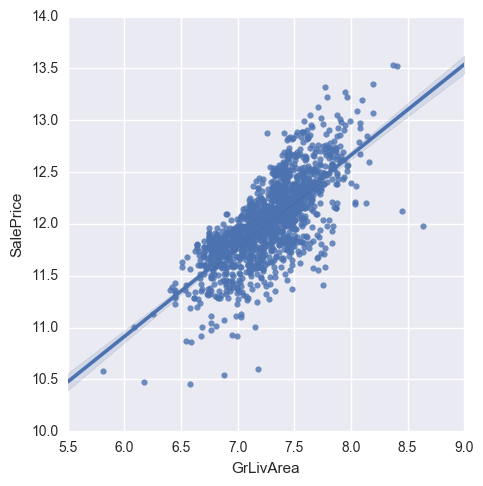

In [32]:
# Applying log to see if there is better linear distribution for GrLiveArea and SalePrice
log_columns = ["GrLivArea", "SalePrice"]
log_housingdata = HousingData.copy()
#log_housingdata[log_columns] = log_housingdata[log_columns].apply(np.log10)
log_housingdata[log_columns] = log_housingdata[log_columns].apply(np.log)

# Plot
x = "GrLivArea"
y = "SalePrice"
#sns.lmplot(x, y, HousingData)
sns.lmplot(x, y, log_housingdata)

(array([   1.,    0.,    1.,    1.,    1.,    0.,    8.,    7.,   16.,
          44.,   93.,   78.,  123.,  119.,  141.,  167.,  160.,  171.,
         115.,   77.,   55.,   43.,   19.,    7.,    7.,    2.,    0.,
           2.,    1.,    1.]),
 array([ 5.81114099,  5.90536942,  5.99959785,  6.09382628,  6.18805471,
         6.28228314,  6.37651157,  6.47074   ,  6.56496843,  6.65919686,
         6.75342529,  6.84765372,  6.94188215,  7.03611058,  7.13033901,
         7.22456744,  7.31879587,  7.4130243 ,  7.50725273,  7.60148116,
         7.69570959,  7.78993802,  7.88416645,  7.97839488,  8.07262331,
         8.16685174,  8.26108017,  8.3553086 ,  8.44953703,  8.54376546,
         8.63799389]),
 <a list of 30 Patch objects>)

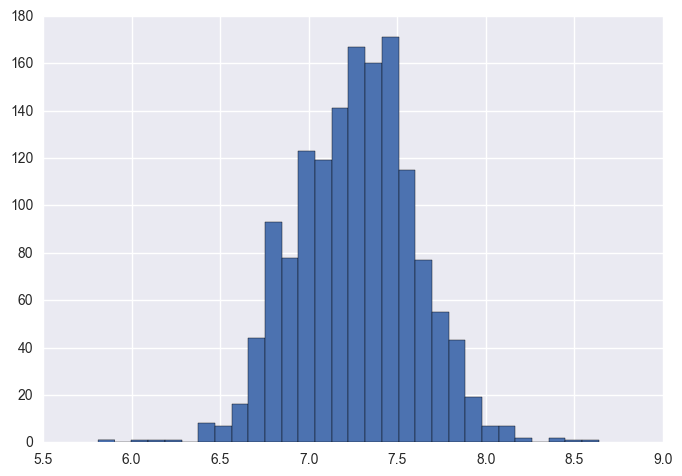

In [35]:
# plotting histogram after applying log function for GrLivArea
#plt.hist(HousingData.GrLivArea, bins=30)
plt.hist(log_housingdata.GrLivArea, bins=30)

Applying log function has brought the data points closer together and the variance has been reduced. Outliers do not look as prominent here. Histogram is closer a normal distribution.

In [36]:
# Seaborn Pairplot to visualise the correlation between relevant independent variables & SalePrice
colstokeep = ["TotalBsmtSF","GrLivArea","GarageArea","SalePrice"]
Dataforpairplot = HousingData[colstokeep]
Dataforpairplot.head()

,TotalBsmtSF,GrLivArea,GarageArea,SalePrice
0,856,1710,548,208500
1,1262,1262,460,181500
2,920,1786,608,223500
3,756,1717,642,140000
4,1145,2198,836,250000


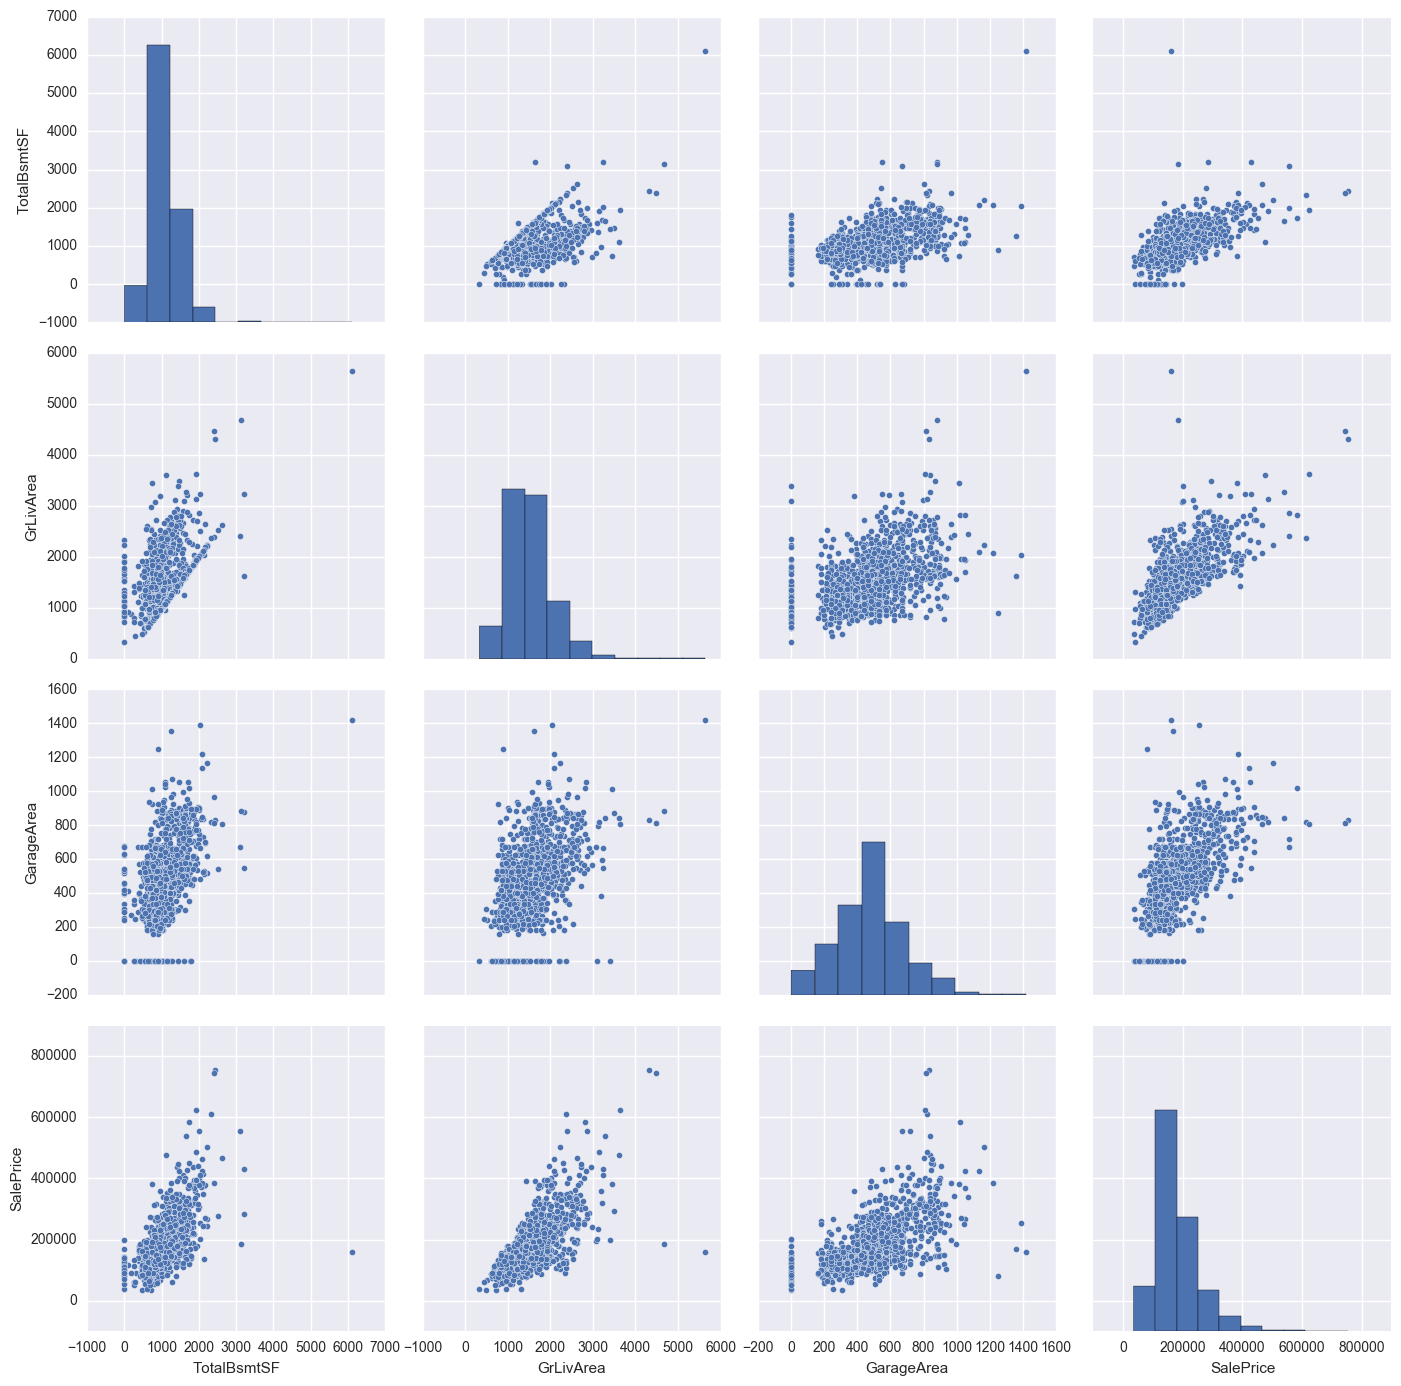

In [37]:
# PairPlot of the data using seaborn - continuous variables and SalePrice correlation plot
sns.pairplot(Dataforpairplot, size=3.5)
sns.plt.show()

These pairplots show reasonably good linear relationship between "TotalBsmtSF","GrLivArea","GarageArea" and "SalePrice". Therefore these variables will be included in the linear regression model.

"MasVnrArea" has a correlation matrix with "SalePrice" of 0.477. Adding MasVnrArea to the regression model.

In [85]:
# Applying log to TotalBsmtSF, GrLivArea, GarageArea, MasVnrArea
log_columns = ["TotalBsmtSF", "GrLivArea", "GarageArea","MasVnrArea"]
#log_columns = ["TotalBsmtSF", "GrLivArea", "GarageArea","MasVnrArea","SalePrice"]
log_housingdata = HousingData.copy()
log_housingdata.replace([0],[1],inplace=True) #replacing 0 with 1 to avoid the infinity error with log transformation
log_housingdata[log_columns] = log_housingdata[log_columns].apply(np.log)

In [86]:
# Preparing for Pairplot after applying log function
log_columnsSale=["TotalBsmtSF", "GrLivArea", "GarageArea","MasVnrArea","SalePrice"]
Dataforpairplot = log_housingdata[log_columnsSale]
Dataforpairplot.head()

,TotalBsmtSF,GrLivArea,GarageArea,MasVnrArea,SalePrice
0,6.752270,7.444249,6.306275,5.278115,208500
1,7.140453,7.140453,6.131226,0.000000,181500
2,6.824374,7.487734,6.410175,5.087596,223500
3,6.628041,7.448334,6.464588,0.000000,140000
4,7.043160,7.695303,6.728629,5.857933,250000


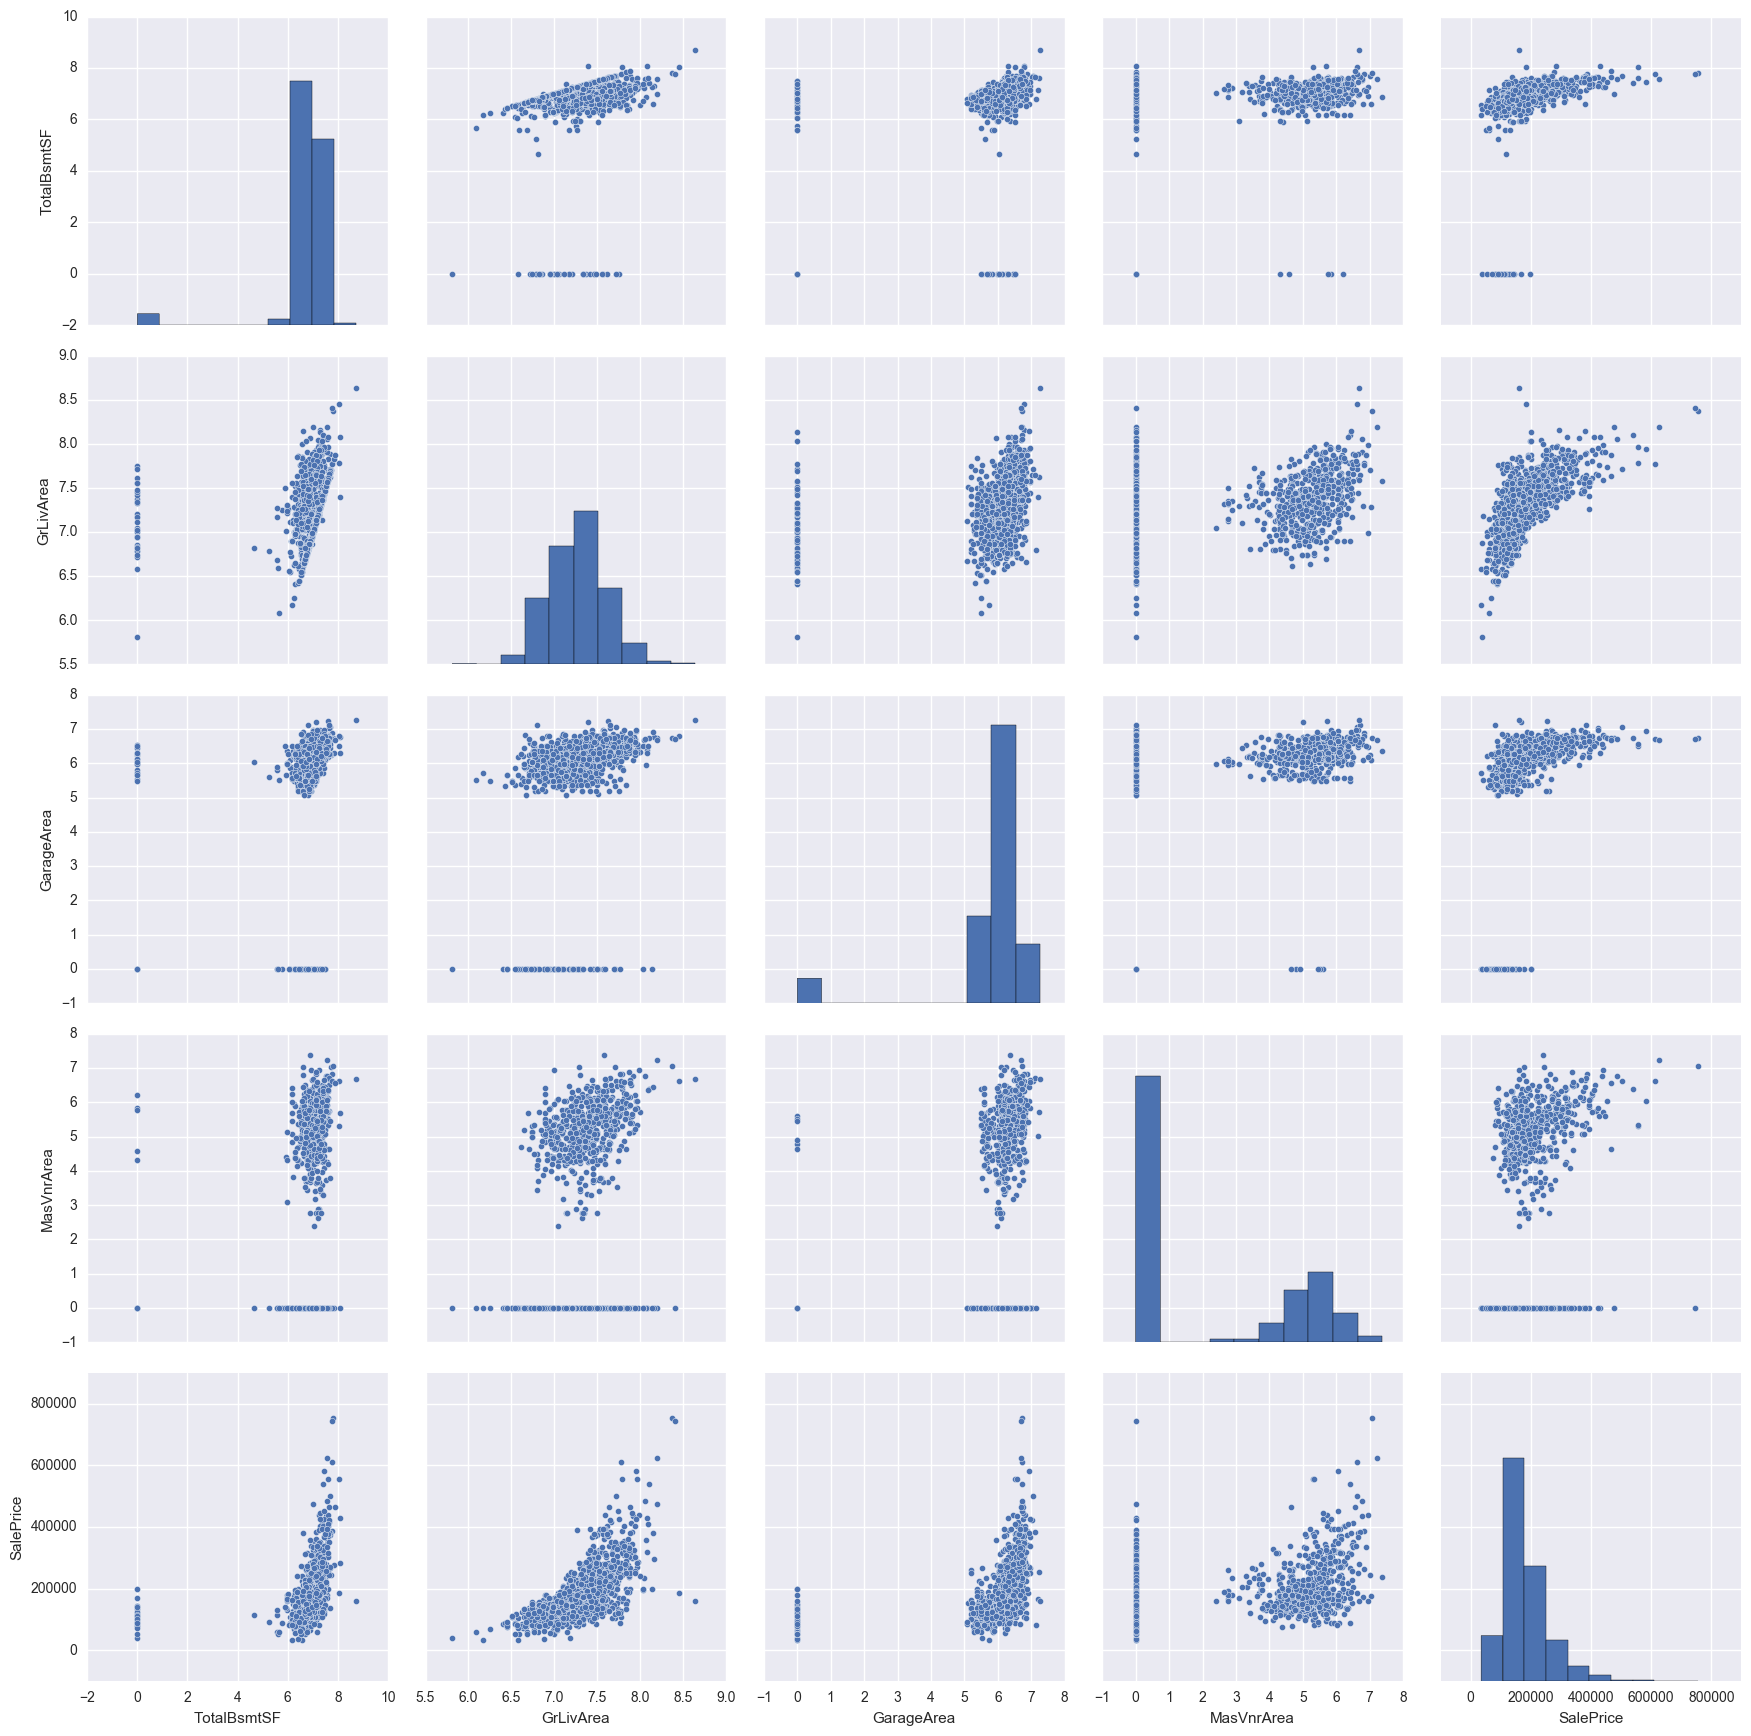

In [87]:
# Pairplot after applying natural log function to "TotalBsmtSF", "GrLivArea", "GarageArea","MasVnrArea"
sns.pairplot(Dataforpairplot, size=3.5)
sns.plt.show()

The correlation of above pairplots have diminished after applying natural log function to the dependent variables. Therefore the original values will be used for regression.

In [81]:
# Linear regression model using continuous variables - Model 1
import statsmodels.formula.api as smf

#X = HousingData[["GrLivArea","LotArea","GarageArea"]] #R sq 0.614
#X = HousingData[["GrLivArea"]] #smaller R 0.5
#X = HousingData[["TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","GarageArea"]] #R sq 0.666
#X = HousingData[["TotalBsmtSF","GrLivArea","GarageArea"]] #R sq 0.662

X = HousingData[["TotalBsmtSF","GrLivArea","GarageArea","MasVnrArea"]] #Adj R sq 0.673
y = HousingData["SalePrice"]

#X = log_housingdata[["TotalBsmtSF","GrLivArea","GarageArea","MasVnrArea"]] #Adj R sq 0.566
#X = log_housingdata[["TotalBsmtSF","GrLivArea","GarageArea"]] #Adj R sq 0.54
#y = log_housingdata["SalePrice"]

# create a fitted model in one line
# formula notation is the equivalent to writting out our models such that "outcome = predictor"
# with the follwing syntax formula = "outcome ~ predictor1 + predictor2 ... predictorN"
lm = smf.ols(formula = "y ~ X", data = HousingData).fit()

#lm = smf.ols(formula = "y ~ X", data = log_housingdata).fit()

# print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     751.8
Date:                Thu, 17 Nov 2016   Prob (F-statistic):               0.00
Time:                        11:50:20   Log-Likelihood:                -17726.
No. Observations:                1460   AIC:                         3.546e+04
Df Residuals:                    1455   BIC:                         3.549e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -1.538e+04   4153.999     -3.702      0.000     -2.35e+04 -7228.677
X[0]          45.3637      3.288     13.797      0.000        38.914    51.813
X[1]          64.5487      2.743     23.535      0.000        59.169    69.929
X[2]          94.9464      6.815     13.931      0.000        81.578   108.315
X[3]          54.0135      7.450      7.251      0.000        39.400    68.627
==============================================================================
Omnibus:                      789.842   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70534.498
Skew:                          -1.612   Prob(JB):                         0.00
Kurtosis:                      36.898   Cond. No.                     7.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Continuous variables X[0] to X[3]:

All independent variables in this linear model TotalBsmtSF,GrLivArea,GarageArea represented by X[0] to X[2] are statistically significant with a p-value less than 0.05. Adjusted R squared of 0.661 show that 66.1% of SalePrice variance can be explained by these independent variables.

Added X[3] MasVnrArea to the regression model. This has increased the Adj R squared to 0.673. P value is less than 0.05.

1stFlrSF and 2ndFlrSF were validated with this model and found to be statistically insignificant as expected.

In [39]:
#Creating dummy variables for the Categorical variable Neighborhood to analyse the relationship of that with SalePrice
#Using Linear model
cols_to_keep = ["TotalBsmtSF","GrLivArea","GarageArea","MasVnrArea"]
dummy_neigh=pd.get_dummies(HousingData["Neighborhood"],prefix="Neigh")
dummy_kitch=pd.get_dummies(HousingData["KitchenQual"],prefix="Kitch")
dummy_fire=pd.get_dummies(HousingData["Fireplaces"],prefix="Fire")
dummy_overall=pd.get_dummies(HousingData["OverallCond"],prefix="Overall")

#dummy_overall.head()

DataDummy = HousingData[cols_to_keep].join(dummy_neigh.ix[:, "Neigh_Blueste":]).join(dummy_kitch.ix[:, "Kitch_Fa":]).join(dummy_fire.ix[:, "Fire_1":]).join(dummy_overall.ix[:, "Overall_2":]).join(HousingData['SalePrice'])
DataDummy.head()

,TotalBsmtSF,GrLivArea,GarageArea,MasVnrArea,Neigh_Blueste,Neigh_BrDale,Neigh_BrkSide,Neigh_ClearCr,Neigh_CollgCr,Neigh_Crawfor,...,Fire_3,Overall_2,Overall_3,Overall_4,Overall_5,Overall_6,Overall_7,Overall_8,Overall_9,SalePrice
0,856,1710,548,196.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,208500
1,1262,1262,460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,181500
2,920,1786,608,162.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,223500
3,756,1717,642,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,140000
4,1145,2198,836,350.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,250000


In [40]:
#Linear regression model with continuous vars as well as categorical vars Neighborhood, KitchenQual, Fireplaces, OverallCond 
#Linear Model 2
X=DataDummy.ix[:,:"Overall_9"]
#X.head()
y=DataDummy['SalePrice']
linearmodel2 = smf.ols(formula = "y ~ X", data = DataDummy).fit()

# print the full summary
linearmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     161.7
Date:                Wed, 16 Nov 2016   Prob (F-statistic):               0.00
Time:                        10:35:54   Log-Likelihood:                -17262.
No. Observations:                1460   AIC:                         3.461e+04
Df Residuals:                    1417   BIC:                         3.484e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   9.095e+04   3.56e+04      2.554      0.011      2.11e+04  1.61e+05
X[0]          27.1983      2.672     10.178      0.000        21.956    32.440
X[1]          50.2762      2.385     21.081      0.000        45.598    54.955
X[2]          41.6770      5.611      7.428      0.000        30.671    52.684
X[3]          20.6850      6.037      3.426      0.001         8.843    32.527
X[4]       -2.521e+04   2.53e+04     -0.995      0.320     -7.49e+04  2.45e+04
X[5]       -3.323e+04   1.23e+04     -2.709      0.007     -5.73e+04 -9163.866
X[6]       -2.431e+04   9779.392     -2.486      0.013     -4.35e+04 -5131.325
X[7]        2304.5902   1.06e+04      0.217      0.828     -1.85e+04  2.31e+04
X[8]        7375.3418   8707.468      0.847      0.397     -9705.572  2.45e+04
X[9]       -1250.9164   9843.623     -0.127      0.899     -2.06e+04  1.81e+04
X[10]      -2.899e+04   9242.500     -3.137      0.002     -4.71e+04 -1.09e+04
X[11]       8266.7892   9122.687      0.906      0.365     -9628.634  2.62e+04
X[12]      -3.812e+04   1.03e+04     -3.685      0.000     -5.84e+04 -1.78e+04
X[13]      -3.384e+04   1.19e+04     -2.840      0.005     -5.72e+04 -1.05e+04
X[14]      -1.125e+04   9738.671     -1.156      0.248     -3.04e+04  7849.438
X[15]      -2.299e+04   8839.088     -2.601      0.009     -4.03e+04 -5654.753
X[16]       -1.76e+04   1.41e+04     -1.253      0.211     -4.52e+04  9964.428
X[17]      -1.834e+04   9388.403     -1.954      0.051     -3.68e+04    74.454
X[18]        5.97e+04   1.01e+04      5.900      0.000      3.99e+04  7.96e+04
X[19]       4.964e+04   9314.095      5.330      0.000      3.14e+04  6.79e+04
X[20]      -4.311e+04   9294.671     -4.638      0.000     -6.13e+04 -2.49e+04
X[21]      -3.978e+04   1.11e+04     -3.591      0.000     -6.15e+04 -1.81e+04
X[22]      -2.038e+04   9380.926     -2.173      0.030     -3.88e+04 -1980.669
X[23]      -1063.4731   9356.848     -0.114      0.910     -1.94e+04  1.73e+04
X[24]        2.08e+04   9046.610      2.300      0.022      3057.070  3.85e+04
X[25]        6.49e+04   1.07e+04      6.081      0.000       4.4e+04  8.58e+04
X[26]       1.856e+04   9902.472      1.875      0.061      -860.115   3.8e+04
X[27]       2.227e+04   1.31e+04      1.694      0.091     -3519.715  4.81e+04
X[28]      -6.498e+04   7455.689     -8.716      0.000     -7.96e+04 -5.04e+04
X[29]      -5.132e+04   4150.012    -12.367      0.000     -5.95e+04 -4.32e+04
X[30]      -6.261e+04   4628.823    -13.527      0.000     -7.17e+04 -5.35e+04
X[31]       7853.8751   2200.501      3.569      0.000      3537.286  1.22e+04
X[32]       2.884e+04   3841.068      7.508      0.000      2.13e+04  3.64e+04
X[33]      -7.011e+04   1.58e+04     -4.446      0.000     -1.01e+05 -3.92e+04
X[34]      -8006.7052   3.72e+04     -0.215      0.830     -8.09e+04  6.49e+04
X[

Added Categorical predictor Neighborhood X[4] to X[27]: 
Adjusted R squared value has improved to 0.772. 77.2% of variance in SalePrice can now be related to the independent variables chosen. 
P-values for some of the Neighborhoods are statistically significant: X[4] BrDale, X[5] BrkSide, X[10] Edwards, X[12] IDOTRR, X[18] to X[21] NoRidge, NRidgHt, OldTown, SWISU and X[25] StoneBr.

Added Categorical predictor KitchenQual X[28] to X[30]: 
Adjusted R squared value has improved to 0.801. 80.1% of variance in SalePrice can now be related to the independent variables chosen. 
P-values for KitchenQual are statistically significant, well below 0.05.

Added Categorical predictor Fireplaces X[31] to X[33]: 
Adjusted R squared value has improved to 0.812. 81.2% of variance in SalePrice can now be related to the independent variables chosen. 
P-values for Fireplaces are statistically significant, well below 0.05.

Adding categorical predictor YearRemodAdd only increased adjusted R squared value slightly to 0.818. Considering the large number of dummy variables (60) associated with this, removed this variable from the regression model inorder to reduce the complexity.

Adding categorical predictor OverallCond X[34] to X[41]: 
Adjusted R squared value has improved to 0.821. One P-value is lower than 0.05.

Added continuous predictor MasVnrArea X[3]:
Adjusted R squared value has improved to 0.822. P-value is lower than  0.05.

### Summary of findings
There is relationship between independent variables and the dependent variable Sale Price from analysing Ames Housing dataset.

Applied log transformation to independent variables as the original pairplot appeared to be funneling out. However this did not make any improvements to the correlation of independent variables and SalePrice. This also reduced the Adjusted R squared value. Therefore the original data will be used for further analysis.

#### Independent variables that have significant relationship with SalePrice include:

Continuous variables: "TotalBsmtSF","GrLivArea","GarageArea","MasVnrArea"

Categorical variables:
"Neighborhood",
"KitchenQual",
"Fireplaces",
"OverallCond"

Adjusted R squared value 0.822. 82.2% of the variance of SalePrice can be related to the independent variables mentioned here.

Null hypothesis has been rejected and alternative hypothesis will be analysed further inorder to predict Sale Price.